In [1]:
import numpy as np
import pandas as pd
import os
import sys
import time as time
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(1, module_path + '/src')
import utility

import sktime
from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sktime.classification.hybrid import HIVECOTEV1

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sktime.classification.shapelet_based import ROCKETClassifier

from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 10, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 7, weight = 1000)
color_map = ['#8ECAE6', '#219EBC', '#023047', '#FFB703', '#FB8500']
class_names = ['crackle', 'no-crackle']

In [6]:
X, y = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/crackleNoCrackle_3000_same_ESSUA.ts')
X, y = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y)

labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

['0' '1'] [1729 3068]


In [2]:
X_train, y_train = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/crackleNoCrackle_3000_same_ESSUA.ts')
X_test, y_test = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/crackleNoCrackle_3000_same_AUTH.ts')
X_train, y_train  = shuffle(X_train, y_train , random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)
labels_test, counts_test = np.unique(y_test, return_counts=True)
print(labels_test, counts_test)

['0' '1'] [2316 4080]
['0' '1'] [ 54 448]


# ROCKET

In [4]:
start = time.time()
rocket = ROCKETClassifier(num_kernels=1000, random_state=0)
rocket.fit(X_train, y_train)
end = time.time()
print('train time: ', str(end - start))
start = time.time()
rocket_y_pred = rocket.predict(X_test)
print(f'Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != rocket_y_pred).sum()}')
print(classification_report(rocket_y_pred, y_test))
end = time.time()
print('Predict time: ', str(end - start))

train time:  239.5682017803192
Number of mislabeled points out of a total 502 points : 91
              precision    recall  f1-score   support

           0       0.28      0.22      0.25        67
           1       0.88      0.91      0.90       435

    accuracy                           0.82       502
   macro avg       0.58      0.57      0.57       502
weighted avg       0.80      0.82      0.81       502

Predict time:  17.934311866760254


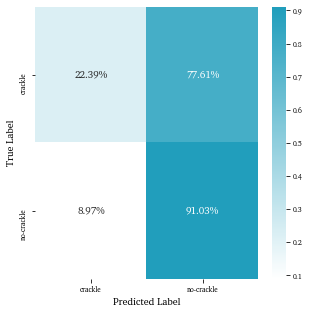

In [5]:
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 10, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 7, weight = 1000)
color_map = ['#8ECAE6', '#219EBC', '#023047', '#FFB703', '#FB8500']
class_names = ['crackle', 'no-crackle']

cm = confusion_matrix(rocket_y_pred, y_test)
f, ax = plt.subplots(1,1) # 1 x 1 array , can also be any other size
f.set_size_inches(5, 5)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

colors_2 = ['#FFFFFF', color_map[1]]
cmap_name = 'my colormap'
cm_map = LinearSegmentedColormap.from_list(cmap_name, colors_2)

ax = sns.heatmap(cm, annot=True,
            fmt='.2%', cmap=cm_map, xticklabels=class_names,yticklabels=class_names )
cbar = ax.collections[0].colorbar
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
ax.set_ylabel('True Label', fontproperties = font)
ax.set_xlabel('Predicted Label', fontproperties = font)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

for child in ax.get_children():
    if isinstance(child, matplotlib.text.Text):
        child.set_fontproperties(font)
for l in cbar.ax.yaxis.get_ticklabels():
    l.set_fontproperties(font_small)